In [1]:
using PyPlot
pygui(true)

# Import necessary packages
using Luna
using LaTeXStrings
using DelimitedFiles

In [2]:
# Defining plack taper function

λmin = 950e-9 #820e-9 #945e-9
λmax = 1150e-9 #1280e-9 #1145e-9
windowwidth = 50e-9 #20e-9

pt = λ -> Maths.planck_taper(λ, λmin-windowwidth, λmin, λmax, λmax+windowwidth)

#11 (generic function with 1 method)

In [3]:
# Defining wavelength arrays for the mirror data and for the simulation grid
L = 380.1934e-3 
λ0 = 1030e-9
λlims = (700e-9, 1400e-9)
trange = 10*150e-15

grid = Grid.RealGrid(L, λ0, λlims, trange)

λgrid = PhysData.wlfreq.(grid.ω) #700e-9: 1e-9: 1400e-9
println(size(λgrid))
println(size(grid.ω))
λR = 800e-9: 1e-9: 1300e-9

┌ Info: Freq limits 0.21 - 0.43 PHz
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:40
┌ Info: Samples needed: 3854.47, samples: 4096, δt = 389.16 as
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:44
┌ Info: Requested time window: 1500.0 fs, actual time window: 1594.0 fs
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:46
┌ Info: Grid: samples 2048 / 4096, ωmax 4.04e+15 / 8.07e+15
└ @ Luna.Grid C:\Users\muelderk\.julia\packages\Luna\7FAkO\src\Grid.jl:78


(1025,)
(1025,)


8.0e-7:1.0e-9:1.3e-6

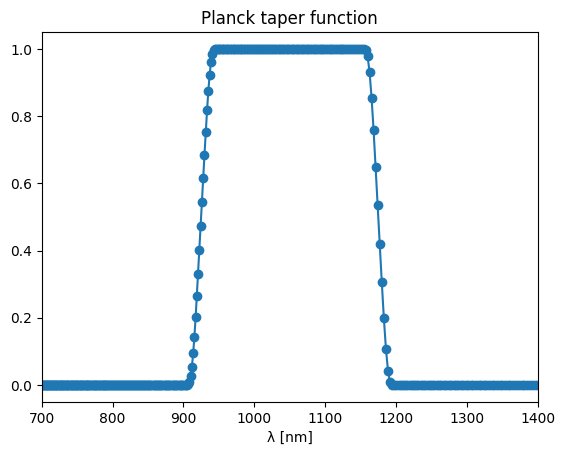

In [4]:
# Plot Planck taper function

plt.figure()
plt.title("Planck taper function")
plt.plot(λgrid.*1e9, pt.(λgrid), marker="o")
plt.xlabel("λ [nm]")
plt.xlim(700, 1400)
# plt.show()
display(gcf())

In [5]:
taper = pt.(λgrid) 
println(typeof(taper))
println(typeof(taper'))

Vector{Float64}
LinearAlgebra.Adjoint{Float64, Vector{Float64}}


In [6]:
a = [1 2 3; 4 5 6]

b = [1,2,3]
println(typeof(b'))
println(size(b))

c = reshape(b, length(b), 1)
println(c)
println(size(c))

println(a.*b')

LinearAlgebra.Adjoint{Int64, Vector{Int64}}
(3,)
[1; 2; 3;;]
(3, 1)
[1 4 9; 4 10 18]


In [7]:
# READING IN MIRROR DATA

file_low_GDD = joinpath("input", "mirrordata_0fs2.txt")
file_high_GDD = joinpath("input", "mirrordata_-30fs2.txt")

data = readdlm(file_low_GDD, skipstart=1)

λR = data[:,1].*1e-9    # read in wavelength [m]
R = data[:,2].*1e-2     # read in reflectivity [fractions]

λGDD = data[:,1].*1e-9  # read in wavelength [m]
GDD = data[:,3].*1e-30  # read in GDD [s]

501-element Vector{Float64}:
 -5.79717419e-28
 -3.61413346e-28
 -2.2142746800000004e-28
 -1.32489848e-28
 -7.7495477e-29
 -4.529729300000001e-29
 -2.8334148000000003e-29
 -2.1224169000000003e-29
 -1.9871232e-29
 -2.0838837000000004e-29
  ⋮
 -2.6209714225e-26
 -1.3096057115e-26
 -9.318107206000002e-27
 -6.717818244000001e-27
 -4.905960325e-27
 -3.621646803000001e-27
 -2.6948734820000003e-27
 -2.014819174e-27
 -2.014819174e-27

In [8]:
r = sqrt.(R)
rspl = Maths.BSpline(λR, r)
   
# Transfer function without phase, only reflectivity
tf =  λ -> rspl(λ) * Maths.planck_taper(λ, λmin-windowwidth, λmin, λmax, λmax+windowwidth)

#13 (generic function with 1 method)

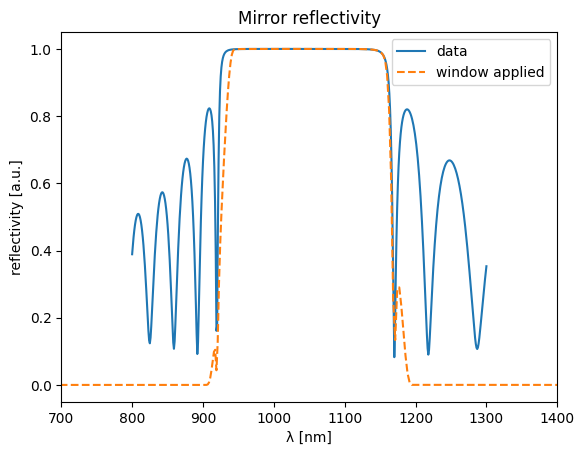

In [10]:
# Plot transfer function with only reflectivity

plt.figure()
plt.title("Mirror reflectivity")
plt.plot(λR.*1e9, r, label="data")
plt.plot(λgrid.*1e9, tf.(λgrid), label="window applied", linestyle="--")
plt.xlim(700, 1400)
plt.xlabel("λ [nm]")
plt.ylabel("reflectivity [a.u.]")
plt.legend()
# plt.show()
display(gcf())